<h1><img align="right" width="350" src="img/ATU-Logo-Full-RGB-Green.jpg"> Programming for Data Analysis - Project 2
</h1>
<p> 
Course: HDip in Computing in Data Analytics <br>
Module: Programming for Data Analysis <br>
Lecturer: Brian McGinley <br>
Project: Project 2 for the Programming for Data Analysis module of the HDip in Data Analytics beginning January 2023. 
    
Student: Eilis Donohue (G00006088)

Project spec:
See assessment/Project 2 - PfDA.pdf

Software Used: 
 - Python v3.10 and higher
 - Jupyter Notebook 6.5.2   
 </p>

## Introduction

A number of data sources ranging from 800,000 years ago (800 kyr BP) to present data were gathered and analysed. These are:

- The CO2 measurements [1, 16], temperature anomaly [2] and CH4 [18] data from 800 kyr BP to modern times obtained from the analysis of the gas entrapped in air bubbles in ice cores drilled at various locations in Antarctica.
- The modern day CO2 level measurements from Mauna Loa [3]
- The modern day temperature anomaly data from the Global Mean Surface Temperature (GMST) analysis and trending [6, 15], measured with respect to the average temperature (1950-1980).
- The Irish temperature, precipitation measurements from around 1850 onwards [11, 17].

The pertinent data has been extracted from each of these datasources and fused together in a single dataframe located in [HOLD].

In [1]:
# Import required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import numpy as np
import os
import glob
from sklearn.linear_model import LinearRegression

In [2]:
# Function definitions
# Assigns a source class to the data to allow for referencing of data
def assign_source(the_data, sources, idx_start):
  for i, source in enumerate(sources):
    the_data.loc[idx_start[i]:idx_start[i+1]-1, 'source'] = source
  return the_data

# Divide the x-axis value by 1000 (for year to kyrs)
def xaxis_format(value, pos):
    return f'{value/1000:.0f}'

## The CO2 and Temperature anomaly plot (800krs BP - present)

The ice-core CO2 measurements as reported by Luthi and Bereiter, along with the Jouzel temperature data is plotted below. The temperature signal is carried by Deuterium isotope in the water (Deuterium is an isotope of Hydrogen) and hte CO2 and CH4 signals are carried by air bubbles trapped in the ice. The air bubbles trapped by ice are always deemed to be younger than the ice owing to the time lag between snow falling and it being compacted to form ice.[7]

<figure>
<img src="https://www.euanmearns.com/wp-content/uploads/2014/11/antarctic_ice_core_stations.jpg"  width="500px">
<figcaption style = 'text-align: left' > The drill locations for the ice-core samples [7] </figcaption>
</figure>


Taking the Luthi Data (composite data) ranging from XX to XX years but substituting teh Bereiter data for the period 612-800 kyr BP which was corrected 

The Bereiter composite data uses the AICC2012 gas age scale whereas Luthi uses EDC3 scale. The temperature anomaly data [HOLD] uses the EDC3 scale (which is defined as years before 1950). There is some time lag between the two datasets around 400kyrs BP as shown below.

In [3]:
# Read in Bereiter's supplementary data
CO2_comp_df = pd.read_excel('data/grl52461-sup-0003-supplementary.xls', sheet_name='CO2 Composite')
# Save the header info
CO2_comp_df_header = CO2_comp_df.iloc[:11]
# Drop the header and assign column names
CO2_comp_df.drop(CO2_comp_df.index[:14], inplace=True)
CO2_comp_df.columns=['Gasage (yr BP)', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)']
CO2_comp_df.reset_index(drop=True, inplace=True)

In [4]:
sources = CO2_comp_df_header.iloc[:11, 1]
sources = sources.values.tolist()
# Define the index start from the excel where the data is colour coded
idx_start = [0, 248, 253, 348, 638, 833, 911, 1005, 1077, 1301, 1591, 1917]
# Add source column
CO2_comp_df['source'] = ''
CO2_comp_df = assign_source(CO2_comp_df, sources, idx_start)
CO2_comp_df.to_csv("test/co2_comp.csv")

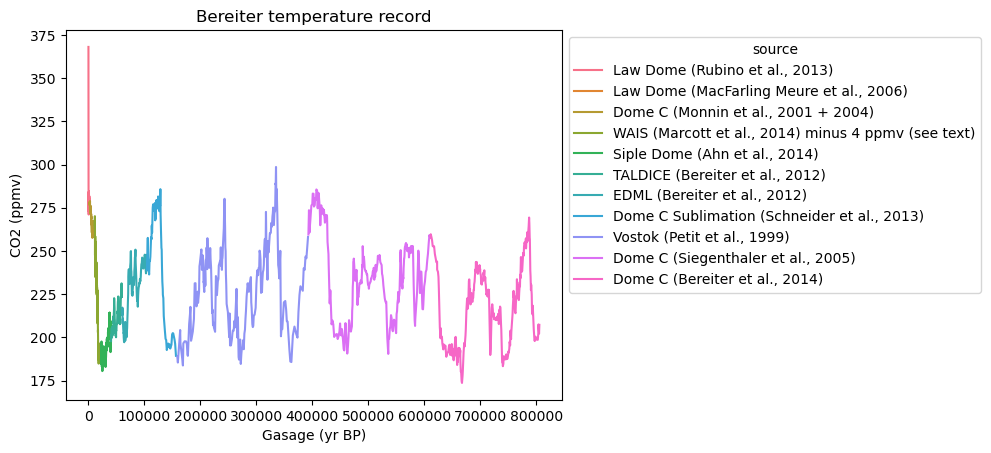

In [5]:
# The Bereiter composite data
ax = sns.lineplot(data=CO2_comp_df, x='Gasage (yr BP)', y='CO2 (ppmv)', hue='source')
ax.set_title('Bereiter temperature record')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [6]:
# Read in Luthi Composite Data  
CO2_luthi_comp = pd.read_excel('data/41586_2008_BFnature06949_MOESM31_ESM.xls', sheet_name='3.  Composite CO2')
CO2_luthi_comp.head(10)

,Composite CO2 record (0-800 kyr BP),Unnamed: 1
0,0-22 kyr BP:,Dome C (Monnin et al. 2001) measured at Univer...
1,22-393 kyr BP:,Vostok (Petit et al. 1999; Pepin et al. 2001; ...
2,393-416 kyr BP:,Dome C (Siegenthaler et al. 2005) measured at ...
3,416-664 kyr BP:,Dome C (Siegenthaler et al. 2005) measured at...
4,664-800 kyr BP:,Dome C (Luethi et al. (sub)) measured at Unive...
5,EDC3_gas_a (yr),CO2 (ppmv)
6,137,280.4
7,268,274.9
8,279,277.9
9,395,279.1


In [7]:
CO2_luthi_comp.drop(CO2_luthi_comp.index[:6], inplace=True)
CO2_luthi_comp.columns=['EDC3_gas_a (yr)', 'CO2 (ppmv)']
CO2_luthi_comp.reset_index(drop=True, inplace=True)

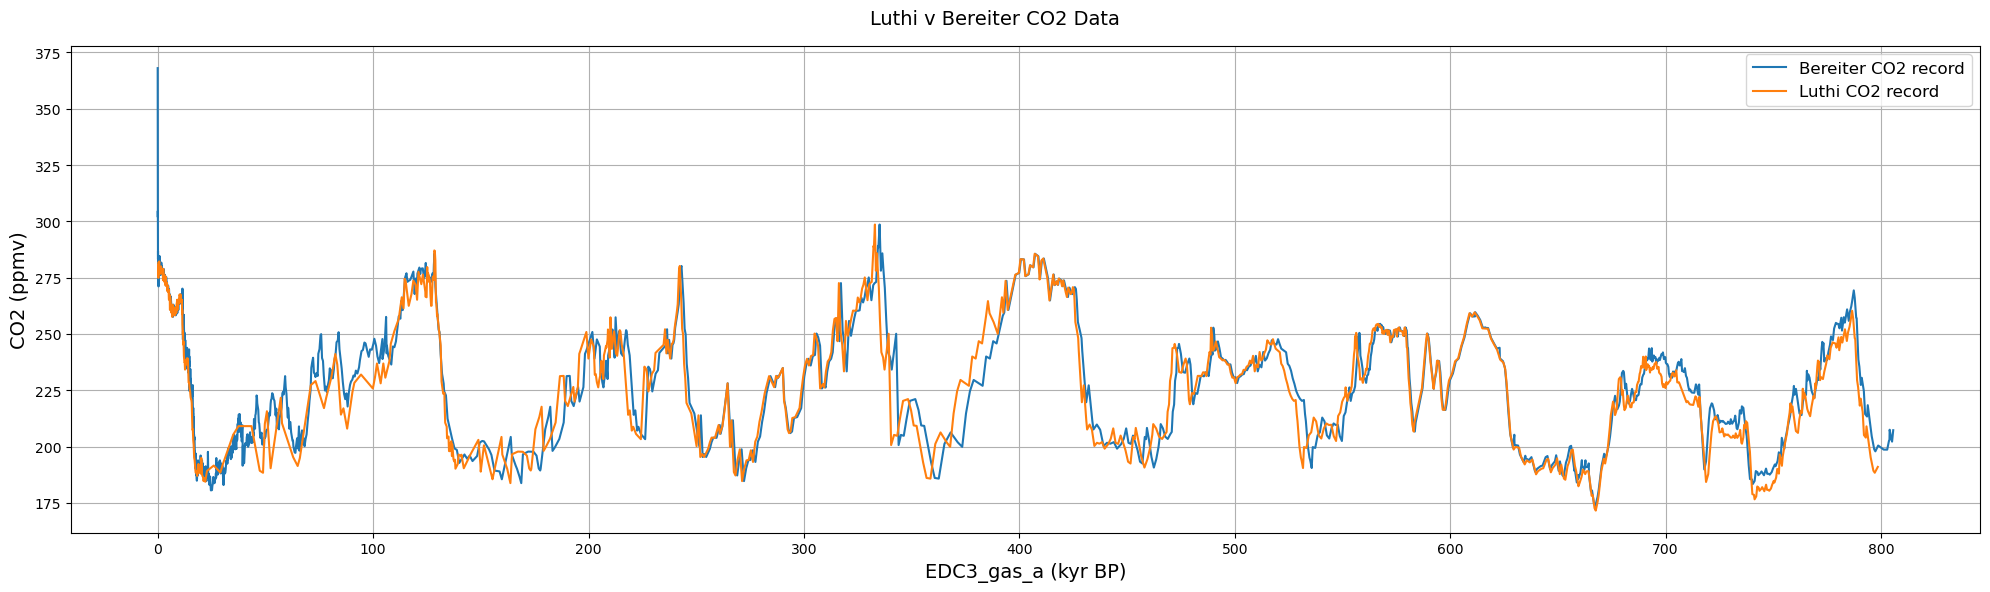

In [48]:
sources_luthi_c = ['Dome C (Monnin et al. 2001) Bern', 'Vostok (Petit et al. 1999; Pepin et al. 2001; Raynaud et al. 2005) LGGE', 'Dome C (Siegenthaler et al. 2005) LGGE', 
                   'Dome C (Siegenthaler et al. 2005) Bern', 'Dome C (Luethi et al. (sub)) Bern']
idx_luthi_c = [0, 183, 517, 537, 867, 1096]
CO2_luthi_comp['source'] = ''
CO2_luthi_comp = assign_source(CO2_luthi_comp, sources_luthi_c, idx_luthi_c)

# plot the data from the Bereiter supplementary data (composite) and the original Luthi data (composite)
fig, ax = plt.subplots(1, figsize=(20, 6))
fig.suptitle('Luthi v Bereiter CO2 Data', fontsize=14)
ax.plot(CO2_comp_df['Gasage (yr BP)'],CO2_comp_df['CO2 (ppmv)'], label='Bereiter CO2 record')
ax.plot(CO2_luthi_comp['EDC3_gas_a (yr)'], CO2_luthi_comp['CO2 (ppmv)'], label='Luthi CO2 record')
ax.legend(loc='upper right', fontsize=12)
ax.set_xlabel('EDC3_gas_a (kyr BP)', fontsize=14)
ax.set_ylabel('CO2 (ppmv)', fontsize=14)
ax.grid()
ax.xaxis.set_major_formatter(FuncFormatter(xaxis_format))
plt.tight_layout()
plt.show()


In [9]:
# Take Luthi's data and replace from 611 kyr BP with Bereither's data, add the < 137 gas age years from Bereiter also.
# Create new dataframe of Luthi data < 611000 gas age
CO2_luthi_comp_plus = CO2_luthi_comp[CO2_luthi_comp['EDC3_gas_a (yr)']<611000]
# Take the Bereiter data (the earliest and latest)
CO2_ber_subset = CO2_comp_df[(CO2_comp_df['source'] == 'Dome C (Bereiter et al., 2014)') | (CO2_comp_df['Gasage (yr BP)'] < 137)]
CO2_ber_subset = CO2_ber_subset.drop('sigma mean CO2 (ppmv)', axis=1).copy()
# change the variable names for concatenation
CO2_ber_subset.columns = CO2_luthi_comp_plus.columns
# Concatenate the Bereiter data (newest and oldest), sort based on gasage and reset the index
CO2_luthi_comp_plus = pd.concat([CO2_luthi_comp_plus, CO2_ber_subset], ignore_index=True).sort_values(by='EDC3_gas_a (yr)').reset_index(drop=True)
CO2_luthi_comp_plus

,EDC3_gas_a (yr),CO2 (ppmv),source
0,-51.03,368.022488,"Law Dome (Rubino et al., 2013)"
1,-48,361.780737,"Law Dome (Rubino et al., 2013)"
2,-46.279272,359.647793,"Law Dome (Rubino et al., 2013)"
3,-44.405642,357.10674,"Law Dome (Rubino et al., 2013)"
4,-43.08,353.946685,"Law Dome (Rubino et al., 2013)"
...,...,...,...
1280,803925.284376,202.921723,"Dome C (Bereiter et al., 2014)"
1281,804009.870607,207.498645,"Dome C (Bereiter et al., 2014)"
1282,804522.67463,204.861938,"Dome C (Bereiter et al., 2014)"
1283,805132.442334,202.226839,"Dome C (Bereiter et al., 2014)"


In [10]:
# Read in the temperature data 
temp_anom = pd.read_csv('data/edc3deuttemp2007.txt', delim_whitespace=True, skiprows=91)
temp_anom

,Bag,ztop,Age,Deuterium,Temperature
0,1,0.00,-50.00000,NaN,NaN
1,2,0.55,-43.54769,NaN,NaN
2,3,1.10,-37.41829,NaN,NaN
3,4,1.65,-31.61153,NaN,NaN
4,5,2.20,-24.51395,NaN,NaN
...,...,...,...,...,...
5795,5796,3187.25,797408.00000,-440.20,-8.73
5796,5797,3187.80,798443.00000,-439.00,-8.54
5797,5798,3188.35,799501.00000,-441.10,-8.88
5798,5799,3188.90,800589.00000,-441.42,-8.92


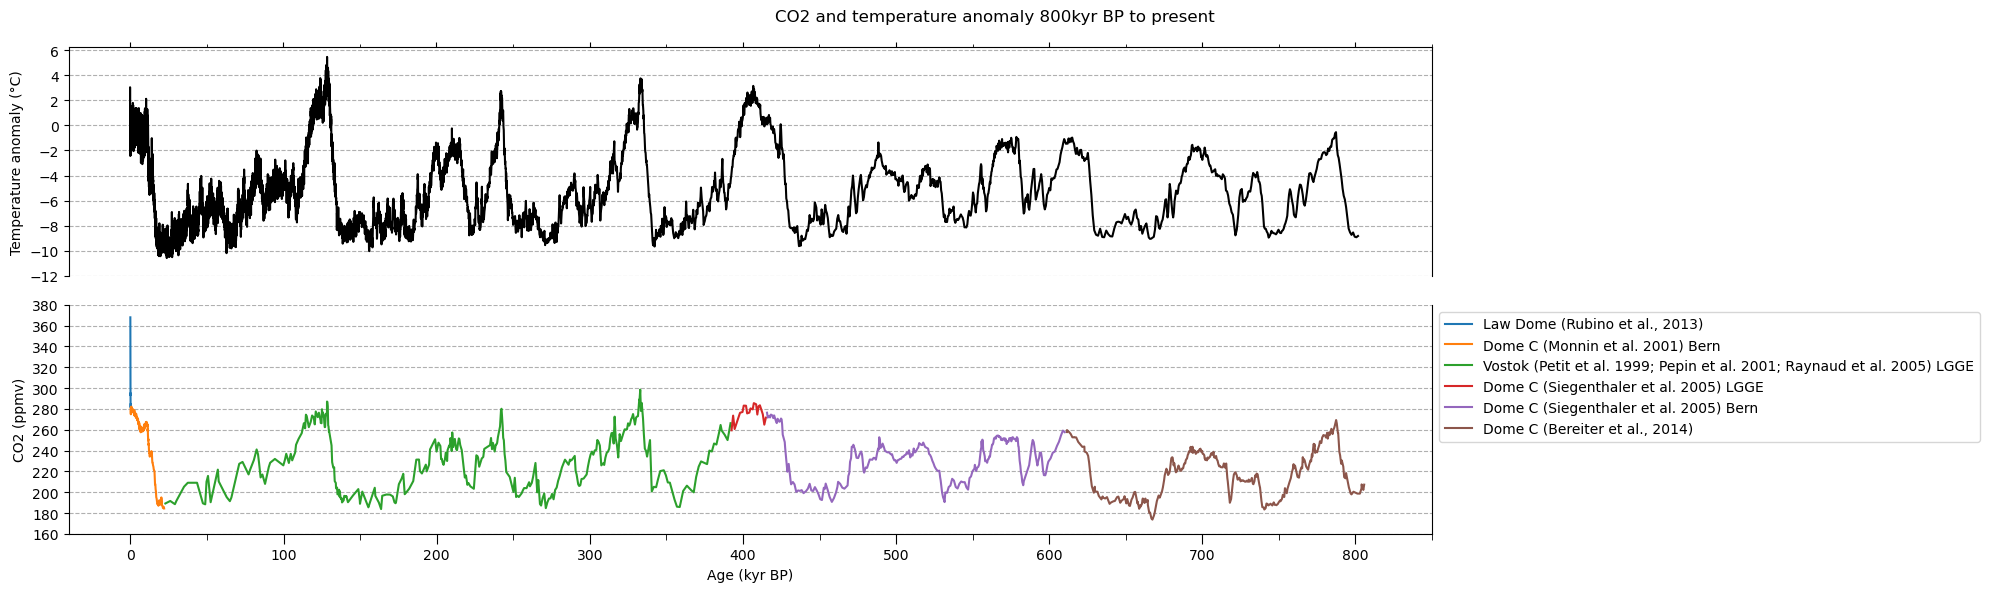

In [11]:
# Create the plot from Luthi Nature (2008) with added CO2 data from Bereither for beginning and end.
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(20, 6))
fig.suptitle('CO2 and temperature anomaly 800kyr BP to present')
sns.lineplot(data=CO2_luthi_comp_plus,  x='EDC3_gas_a (yr)', y='CO2 (ppmv)', ax=ax2, hue='source')
sns.lineplot(data=temp_anom, x='Age', y='Temperature', ax=ax1, color='black')

# Format temp axis
ax1.spines['bottom'].set_visible(False)
ax1.set_xticklabels([])
ax1.set_xlabel('')
ax1.yaxis.grid(True, linestyle='--')
ax1.xaxis.set_ticks_position('top')
ax1.set_xticks([tick for tick in range(0, 900000, 50000)], minor=True)
ax1.set(ylabel="Temperature anomaly (°C)")
ax1.set_yticks([tick for tick in range(-12, 7, 2)])
ax1.set_xticks([tick for tick in range(0, 900000, 50000)], minor=True)
ax1.set_xticks([tick for tick in range(0, 900000, 100000)])
ax1.tick_params(axis='x', which='both', bottom=False, top=True)

# Format CO2 axis
ax2.yaxis.grid(True, linestyle='--')
ax2.tick_params(axis='x', which='both', bottom=True, top=False)
ax2.tick_params(axis='x', which='major', length=7)
ax2.tick_params(axis='x', which='minor', length=4)
ax2.spines['top'].set_visible(False)
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.set_yticks([tick for tick in range(160, 390, 20)])
ax2.set_xticks([tick for tick in range(0, 900000, 100000)])
ax2.set_xticks([tick for tick in range(0, 900000, 50000)], minor=True)
ax2.set(xlabel="Age (kyr BP)")
# https://matplotlib.org/stable/gallery/ticks/tick-formatters.html
ax2.xaxis.set_major_formatter(FuncFormatter(xaxis_format))

plt.tight_layout()
plt.show()

In [12]:
# Merge the CO2 and Temperature data 
# Rename the year variable in both for merge
# https://pandas.pydata.org/docs/reference/api/pandas.merge_ordered.html

climate_data_fusion = pd.DataFrame()
CO2_luthi_comp_plus.rename(columns={'EDC3_gas_a (yr)': 'Age_EDC3 (yrs BP)'}, inplace=True)
temp_anom.rename(columns={'Age': 'Age_EDC3 (yrs BP)'}, inplace=True)
climate_data_fusion = pd.merge_ordered(CO2_luthi_comp_plus, temp_anom[['Age_EDC3 (yrs BP)', 'Temperature',]], how="outer",  on='Age_EDC3 (yrs BP)')
climate_data_fusion.to_csv('test/fusion_test.csv')


C:\Users\eilis.donohue\AppData\Local\Temp\ipykernel_29132\3602027714.py:8: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  climate_data_fusion = pd.merge_ordered(CO2_luthi_comp_plus, temp_anom[['Age_EDC3 (yrs BP)', 'Temperature',]], how="outer",  on='Age_EDC3 (yrs BP)')


## Methane (CH4) Data (Vostok Ice Core data)

The ice cores drilled at Vostock drill location were analysed and the CH4 content was measured for the years spanning 417kyr BP to approximately 1950.

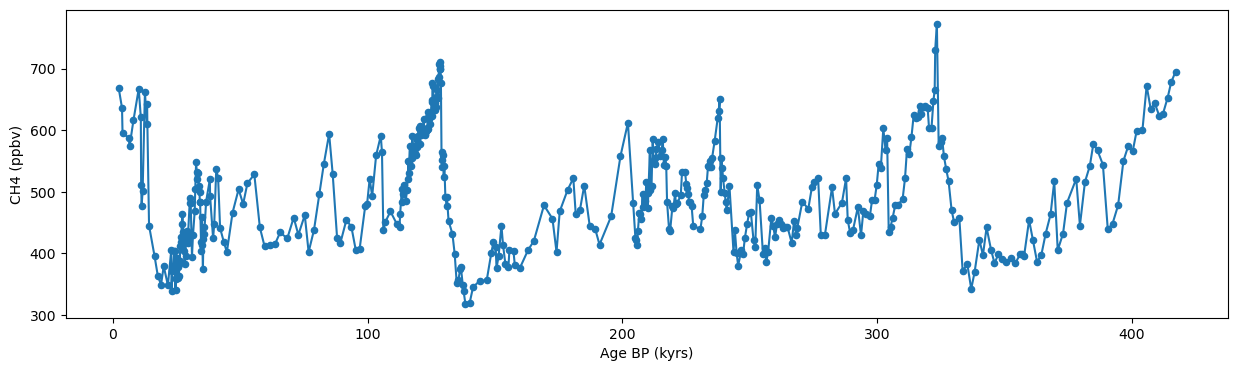

In [13]:
# Read in the CH4 data (Petit (2005))
CH4_comp = pd.read_csv('data/Vostok_CH4_CO2_age.tab', skiprows=15, sep='\t')
CH4_comp.head(10)
# Tidy the dataframe 
#CH4_comp.columns = ['Gas Age (yrs BP)', 'CH4 (ppbv)']
# Changing the years to 1000 to be consistent with CO2 data
CH4_comp['Age [ka BP]'] = CH4_comp['Age [ka BP]'] * 1000
# change the age column name
CH4_comp = CH4_comp.rename(columns={'Age [ka BP]':'Age_EDC3 (yrs BP)'})
# drop nans for plotting the line
CH4_comp_nan_drop = CH4_comp.dropna(subset=['CH4 [ppbv]'])
fig, ax = plt.subplots(1, figsize=(15, 4))
ax.scatter(CH4_comp['Age_EDC3 (yrs BP)'], CH4_comp['CH4 [ppbv]'], s=20)
ax.plot(CH4_comp_nan_drop['Age_EDC3 (yrs BP)'], CH4_comp_nan_drop['CH4 [ppbv]'], linestyle='-');
ax.set_ylabel('CH4 (ppbv)')
ax.set_xlabel('Age BP (kyrs)')
ax.xaxis.set_major_formatter(FuncFormatter(xaxis_format))

In [14]:
# Merge the CH4 data into the fused data dataframe

climate_data_fusion = pd.merge_ordered(climate_data_fusion,  CH4_comp, how="outer",  on='Age_EDC3 (yrs BP)')
climate_data_fusion.to_csv('test/fusion_test.csv')

C:\Users\eilis.donohue\AppData\Local\Temp\ipykernel_29132\2869807574.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  climate_data_fusion = pd.merge_ordered(climate_data_fusion,  CH4_comp, how="outer",  on='Age_EDC3 (yrs BP)')


## Mauna Loa CO2 data

The CO2 levels in the atmosphere have been measured at Mauna Loa since 1958. The yearly seasonal variation can be seen in the plot but the general upward trend is apparent with levels rising year on year.

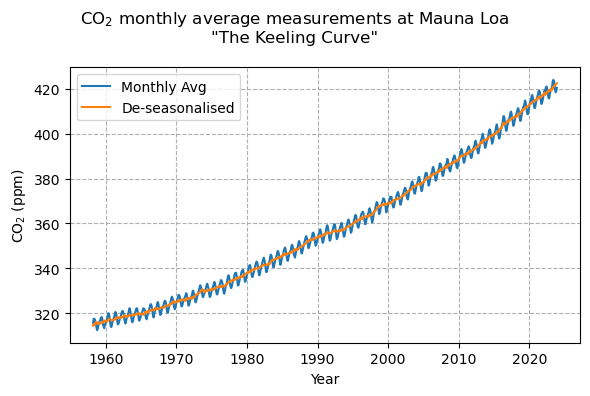

In [33]:
# Read in monthly Mauna Loa CO2 data
CO2_ML_m = pd.read_csv('data/co2_mm_mlo.txt', delim_whitespace=True, skiprows=41)
CO2_ML_m.columns = ['year', 'month', 'decimal date', 'monthly average', 'de-seasonalized', 'no_days', 'std', 'unc of mean']
CO2_ML_m
fig, ax = plt.subplots(1, figsize=(6, 4))
ax.plot(CO2_ML_m['decimal date'], CO2_ML_m['monthly average'], label='Monthly Avg')
ax.plot(CO2_ML_m['decimal date'], CO2_ML_m['de-seasonalized'], label='De-seasonalised')
ax.set_xlabel("Year")
ax.set_ylabel("CO$_2$ (ppm)")
fig.suptitle(f'CO$_2$ monthly average measurements at Mauna Loa\n"The Keeling Curve"')
ax.grid(True, linestyle="--")
ax.legend(loc='upper left')
fig.tight_layout()

# Add a column to convert date to EDC3 scale
CO2_ML_m['EDC3_gas_a (yr)'] = CO2_ML_m['decimal date'] - 1950


## Global Mean Surface Temperature (GMST)
The Global Mean Surface Temperature (GMST) is added to the data as an indicator of temperature / climate change globally since 1850 [15]. The data is given as temperature anomaly with respect to the Jan 1951-Dec 1980 average. It may be used to correlate with the Mauna Loa CO2 data and the later part of the ice-core CO2 data.

The temperature values where air temperatures were used in the presence of sea ice are used. The annual anomaly data was taken from this dataset.

It is included as its own data variable in the fused dataset as it is not contiguous with the temperature anomaly data calculated from the ice-core analysis. 

In [16]:
## GMST
# Read in the data from Berkeley 
GMST_anom_1850 = pd.read_csv('data/Land_and_Ocean_complete_table1.txt', skiprows=84, delim_whitespace=True)
# Trim dataset and rename columns
GMST_anom_1850 = GMST_anom_1850.drop(GMST_anom_1850.columns[[2,3,6,7,8, 9, 10, 11, 12]], axis=1).copy()
GMST_anom_1850.columns = ['Year', 'Month', 'GMST Anomaly Yearly', 'GMST Anomaly Uncertainty']
# Add decimalised year - assuming the data pertains to middle of month
GMST_anom_1850['decimal date'] = GMST_anom_1850['Year'] + ((GMST_anom_1850['Month']-1) /12)+(1/12/2)
# Add EDC3 year
GMST_anom_1850['Age_EDC3 (yrs BP)'] = 1950 - GMST_anom_1850['decimal date']
GMST_anom_1850

,Year,Month,GMST Anomaly Yearly,GMST Anomaly Uncertainty,decimal date,Age_EDC3 (yrs BP)
0,1850,1,NaN,NaN,1850.041667,99.958333
1,1850,2,NaN,NaN,1850.125000,99.875000
2,1850,3,NaN,NaN,1850.208333,99.791667
3,1850,4,NaN,NaN,1850.291667,99.708333
4,1850,5,NaN,NaN,1850.375000,99.625000
...,...,...,...,...,...,...
2082,2023,7,NaN,NaN,2023.541667,-73.541667
2083,2023,8,NaN,NaN,2023.625000,-73.625000
2084,2023,9,NaN,NaN,2023.708333,-73.708333
2085,2023,10,NaN,NaN,2023.791667,-73.791667


## Irish Data

### Irish historical rainfall data

The long term Irish rainfall data (from 1850 to 2010) [11], averaged monthly across 25 stations was obtained from [10]. 

The research of a climate change signal conducted by [hold] showed that annual precipitation correlation with GMST occurred at Valentia, Markree, Malin nad Mullingar stations. ((Seasonal variations were also analysed iwth Spring, only Valentia, Shannon, Mullingar and Markree showed correlation wtih GMST,)) 


In [17]:
# Read in the irish rainfall data
rain = pd.read_csv("data/Long-Term-IIP-network-1/IIP_National series.csv", skiprows=2)

year = rain['Year']
rain.drop('Year', axis=1,  inplace=True)
transposed_values = []
# https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-pandas-dataframe
months = []
year = []
for index, row in rain.iterrows():
    transposed_values.extend(row.values)
    months.extend(rain.columns) 
    
month_dict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
result_series = pd.Series(transposed_values)
month_series = pd.Series(months)
# create a decimalised date series for the data - assuming here each data point is relevant to the middle of the month
date_series = np.arange(1850+(1/12/2), 2011+(1/12/2), 1/12)
year = date_series.astype('int64')
year_series = pd.Series(year)

# https://stackoverflow.com/questions/30522724/take-multiple-lists-into-dataframe
rain_ire_1850 = pd.DataFrame({'decimal date': date_series, 'Year': year_series,'Month': month_series, 'Irish rainfall (mm)': result_series})
rain_ire_1850['Month'] = rain_ire_1850['Month'].replace(month_dict)


## Irish Air Temperature Record

The historical Irish air temperature records have been gathered for various weather stations by researchers in the University of Galway in conjunction with Met Eireann [13]. The main dataset resulting from this study is called the Ireland Long-term Maximum and Minimum Air Temperature Dataset (ILMMT) and is included in /data in this repository. The temperature data is being used to study the long-term climate change in Ireland and derive a signal for climate change in conjunction with long-term rainfall records [14].

In the research conducted by Murphy et al [HOLD], the annual mean temperature showed the emergence of unusual climate with Phoenix Park, Glasnevin, Dublin, Roches Point, Malin Head and Galway showing hte greatest increases.  Dublin stations showed more pronounced increases.

### Methodology

In the absence of a full composite homogenous Irish historical temperature data, a subset (/data/ilmmt_subset) of the long-term series (comprising 12 weather stations) are ingested and averaged. The min and max values are taken from each weather station and averaged with the data from other weather stations. The date is decimalised to allow fusion and comparison with the global data. [HOLD]

The data for each selected station was cleaned prior to ingest by removing fahrenheit data and also consolidating more than 1 maximum or minimum reading into a single maximum and a single minimum for each day.

  - The data (min and max) was read in from the subset of cleaned csv files (/data/ilmmt_subset).
  - It was then averaged across the csv datafiles to create one maximum and one minimum dataseries
  - The daily data was then resampled to monthly data and averaged 
  - Decimalised date and EDC3 date were added to allow merging of the data with the overall fused dataset.

In [18]:
# Read in the historical (1850-circa 1950s) Ireland air temperature data (composite of a number of long-term series files)

# Specify the path to the directory containing the CSV files
directory_path = 'data\ilmmt_subset'
notebook_directory = os.path.dirname(os.path.realpath("__file__"))
os.chdir(notebook_directory)
#os.chdir(directory_path)
print(notebook_directory)
# Change the current working directory to the directory of the script or notebook
#os.chdir(current_directory)

# Use glob to get a list of all CSV files in the directory
met_files = glob.glob(os.path.join(directory_path, '*.csv'))

# Initialise dataframes to store the daily max and min temperature data
temp_ire_max = pd.DataFrame(columns = ['Year', 'Month', 'Day'])
temp_ire_min = pd.DataFrame(columns = ['Year', 'Month', 'Day'])
temp_ire_mean_1850 = pd.DataFrame(columns = ['Year', 'Month', 'Day'])


for i, file in enumerate(met_files):
  data = pd.read_csv(file)
  data_max = data[['Year', 'Month', 'Day', 'Max']]
  data_min = data[['Year', 'Month', 'Day', 'Min']]
  # rename the columns to avoid suffixing
  data_max = data_max.rename(columns={'Max':i})  
  data_min = data_min.rename(columns={'Min':i})  
  temp_ire_max = pd.merge_ordered(temp_ire_max, data_max, on=['Year', 'Month', 'Day'], how='outer')
  temp_ire_min = pd.merge_ordered(temp_ire_min, data_min, on=['Year', 'Month', 'Day'], how='outer')

# Get average across each row (average of the 12 csv files)
cols_mean = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
temp_ire_max['Average max (C)'] = temp_ire_max[cols_mean].mean(axis=1)
temp_ire_min['Average min (C)'] = temp_ire_min[cols_mean].mean(axis=1)
# Get mean
temp_ire_mean_1850['Mean Irish Air temp (deg C)'] = (temp_ire_max['Average max (C)'] + temp_ire_min['Average min (C)'])/2
temp_ire_mean_1850['Year'] = temp_ire_max['Year']
temp_ire_mean_1850['Month'] = temp_ire_max['Month']
temp_ire_mean_1850['Day'] = temp_ire_max['Day']


# Add a datetime column to allow for aggregation https://stackoverflow.com/questions/58072683/combine-year-month-and-day-in-python-to-create-a-date
temp_ire_mean_1850['datetime'] = pd.to_datetime(temp_ire_mean_1850[['Year', 'Month', 'Day']])
# Monthly resample
temp_ire_mean_1850.set_index('datetime', inplace=True)
temp_ire_mean_1850_monthly = temp_ire_mean_1850.resample('M').mean()

# Add decimalised date and EDC date for fusion etc
temp_ire_mean_1850_monthly['decimal date'] = temp_ire_mean_1850_monthly['Year'] + ((temp_ire_mean_1850_monthly['Month']-1) /12)+(1/12/2)
temp_ire_mean_1850_monthly['Age_EDC3 (yrs BP)'] = 1950 - temp_ire_mean_1850_monthly['decimal date'] 
temp_ire_mean_1850_monthly
temp_ire_mean_1850_monthly['Year'] = temp_ire_mean_1850_monthly['Year'].astype('int64').copy()
temp_ire_mean_1850_monthly['Month'] = temp_ire_mean_1850_monthly['Month'].astype('int64').copy()

C:\Users\eilis.donohue\OneDrive - Wood PLC\my_projects\Python_projects\course\PfDA_Project2


C:\Users\eilis.donohue\AppData\Local\Temp\ipykernel_29132\4043111011.py:33: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp_ire_max['Average max (C)'] = temp_ire_max[cols_mean].mean(axis=1)
C:\Users\eilis.donohue\AppData\Local\Temp\ipykernel_29132\4043111011.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp_ire_min['Average min (C)'] = temp_ire_min[cols_mean].mean(axis=1)


In [19]:
# Read in more recent Irish air temperature data (monthly)
# Specify the path to the directory containing the CSV files
directory_path = 'data\Ireland_air_temp'
notebook_directory = os.path.dirname(os.path.realpath("__file__"))
os.chdir(notebook_directory)

# Use glob to get a list of all CSV files in the directory
met_files = glob.glob(os.path.join(directory_path, '*.csv'))
# Initialise dataframes to store the daily max and min temperature data
temp_ire_mean_modern = pd.DataFrame(columns = ['year', 'month'])

for i, file in enumerate(met_files):
  data = pd.read_csv(file, skiprows=19)
  data_mean = data[['year', 'month', 'meant']]
   # rename the columns to avoid suffixing
  data_mean = data_mean.rename(columns={'meant':i})  
  temp_ire_mean_modern = pd.merge_ordered(temp_ire_mean_modern, data_mean, on=['year', 'month'], how='outer')

# Get average across each row (average of the 5 csv files)
cols_mean = [0, 1, 2, 3, 4]
temp_ire_mean_modern['Mean Irish Air temp (deg C)'] = temp_ire_mean_modern[cols_mean].mean(axis=1)
# drop the 5 columns
temp_ire_mean_modern.drop(columns=cols_mean, inplace=True)

# Add a datetime column to allow for aggregation https://stackoverflow.com/questions/58072683/combine-year-month-and-day-in-python-to-create-a-date
temp_ire_mean_modern['day'] = 1
temp_ire_mean_modern['datetime'] = pd.to_datetime(temp_ire_mean_modern[['year', 'month', 'day']])
temp_ire_mean_modern.set_index('datetime', inplace=True)

# Add decimalised date and EDC date for fusion etc
temp_ire_mean_modern['decimal date'] = temp_ire_mean_modern['year'] + ((temp_ire_mean_modern['month']-1) /12)+(1/12/2)
temp_ire_mean_modern['Age_EDC3 (yrs BP)'] = 1950 - temp_ire_mean_modern['decimal date'] 
# Rename year and month for consistency with historical data
temp_ire_mean_modern = temp_ire_mean_modern.rename(columns={'year': 'Year', 'month': 'Month'})
temp_ire_mean_modern
temp_ire_mean_modern['Year'] = temp_ire_mean_modern['Year'].astype('int64').copy()
temp_ire_mean_modern['Month'] = temp_ire_mean_modern['Month'].astype('int64').copy()



In [20]:
# Join the historical data with the modern air temperature data

irish_air_temp_composite = pd.merge_ordered(temp_ire_mean_1850_monthly, temp_ire_mean_modern, how='outer', on=['Year', 'Month', 'decimal date', 'Age_EDC3 (yrs BP)'])
# replace the nans in _x with values from _y and vice versa
irish_air_temp_composite['Mean Irish Air temp (deg C)_x'].fillna(irish_air_temp_composite['Mean Irish Air temp (deg C)_y'], inplace=True)
irish_air_temp_composite['Mean Irish Air temp (deg C)_y'].fillna(irish_air_temp_composite['Mean Irish Air temp (deg C)_x'], inplace=True)
# Now get the average which takes care of the overlapping values
irish_air_temp_composite['Mean Irish Air temp (deg C)'] = (irish_air_temp_composite['Mean Irish Air temp (deg C)_x'] + irish_air_temp_composite['Mean Irish Air temp (deg C)_y'])/2
# drop unwanted
irish_air_temp_composite.drop(columns=['Day', 'day', 'Mean Irish Air temp (deg C)_x', 'Mean Irish Air temp (deg C)_y'], inplace=True)
irish_air_temp_composite



,Year,Month,decimal date,Age_EDC3 (yrs BP),Mean Irish Air temp (deg C)
0,1831,1,1831.041667,118.958333,3.550000
1,1831,2,1831.125000,118.875000,5.234211
2,1831,3,1831.208333,118.791667,8.176087
3,1831,4,1831.291667,118.708333,10.252273
4,1831,5,1831.375000,118.625000,12.627273
...,...,...,...,...,...
2310,2023,7,2023.541667,-73.541667,15.080000
2311,2023,8,2023.625000,-73.625000,15.580000
2312,2023,9,2023.708333,-73.708333,14.880000
2313,2023,10,2023.791667,-73.791667,11.900000


In [21]:
# Irish air / preciptation join
ireland_temp_rain_composite = pd.merge_ordered(irish_air_temp_composite, rain_ire_1850, on=['Year', 'Month'], how='outer')
# tidy decimal date duplicates from merge operation
ireland_temp_rain_composite['decimal date'] = ireland_temp_rain_composite['decimal date_x']
ireland_temp_rain_composite.drop(columns=['decimal date_x', 'decimal date_y'], inplace=True)
ireland_temp_rain_composite



,Year,Month,Age_EDC3 (yrs BP),Mean Irish Air temp (deg C),Irish rainfall (mm),decimal date
0,1831,1,118.958333,3.550000,NaN,1831.041667
1,1831,2,118.875000,5.234211,NaN,1831.125000
2,1831,3,118.791667,8.176087,NaN,1831.208333
3,1831,4,118.708333,10.252273,NaN,1831.291667
4,1831,5,118.625000,12.627273,NaN,1831.375000
...,...,...,...,...,...,...
2310,2023,7,-73.541667,15.080000,NaN,2023.541667
2311,2023,8,-73.625000,15.580000,NaN,2023.625000
2312,2023,9,-73.708333,14.880000,NaN,2023.708333
2313,2023,10,-73.791667,11.900000,NaN,2023.791667


## Analysis of Irish temperature and rainfall data and GMST

The 30 year rolling mean of the irish air temperature composite data is plotted below. There is a general upward trend in the data which ranges from 9.8 deg C (late 1800s) to 10.3 deg C (modern times). The GMST temperature anomaly is plotted along with this data for the same period. This shows a global warming effect of approximately 1.5 deg over the same time period. The GMST temperature anomaly is calculated with respect to the average temperature in the period (1950 to 1980).

Similarly, 30 year rolling mean rainfall amounts have risen in general and since 1975 have seen consistent increase. 

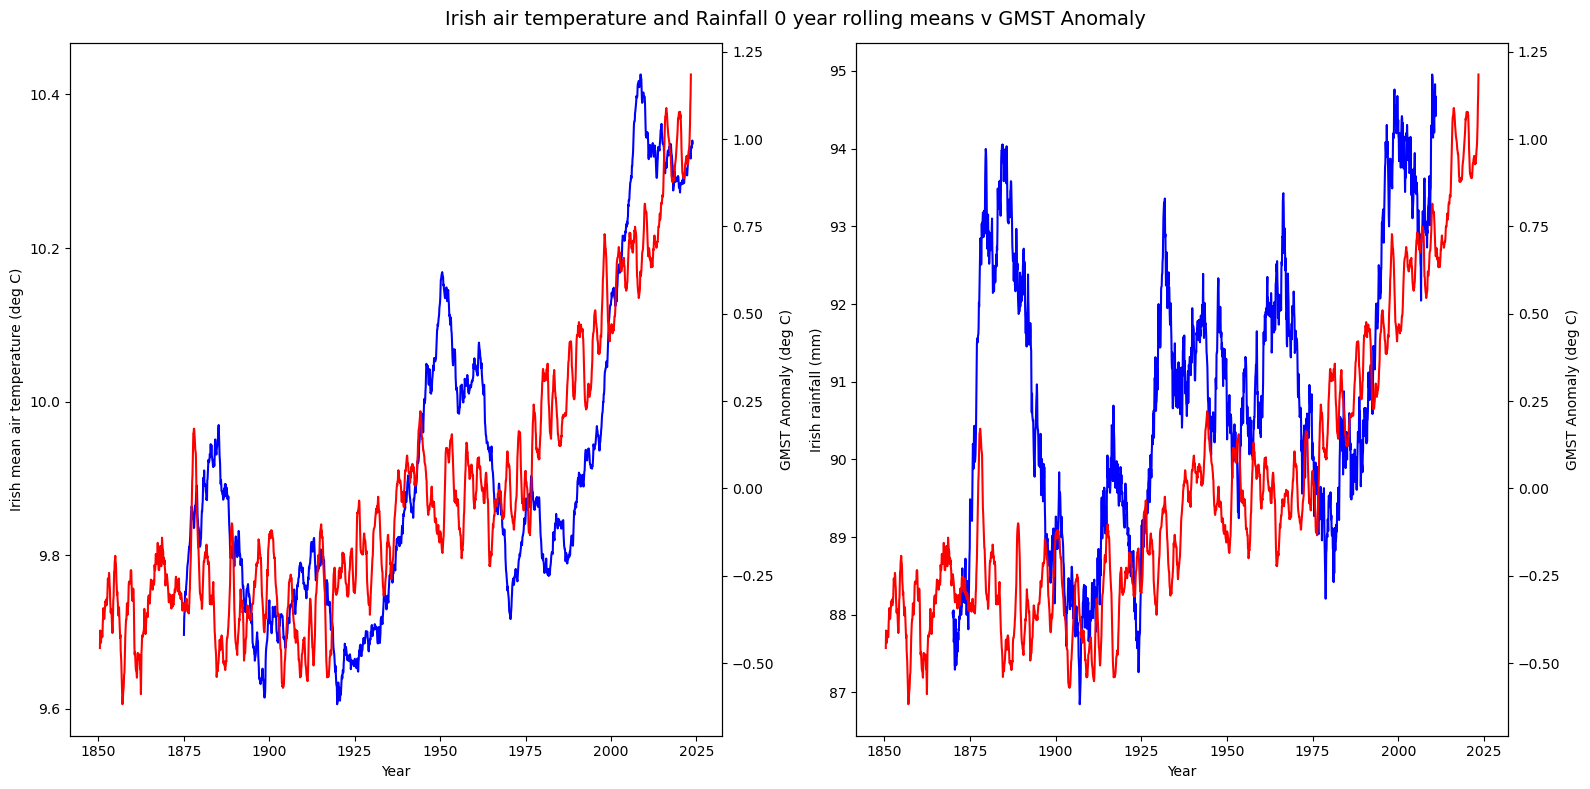

In [22]:

# Get the rolling 30 year average of the irish temperature data
ireland_temp_rolling_average_30yr = ireland_temp_rain_composite['Mean Irish Air temp (deg C)'].rolling(window=(12*20)).mean()
ireland_rain_rolling_average_30yr = ireland_temp_rain_composite['Irish rainfall (mm)'].rolling(window=(12*20)).mean()
ireland_temp_rolling_average_30yr
fig, axs = plt.subplots(1,2, figsize=(16, 8))
fig.suptitle("Irish air temperature and Rainfall 0 year rolling means v GMST Anomaly", fontsize=14)
axs[0].plot(ireland_temp_rain_composite['decimal date'],ireland_temp_rolling_average_30yr, color='blue')
ax2 = axs[0].twinx()
ax2.plot(GMST_anom_1850['decimal date'], GMST_anom_1850['GMST Anomaly Yearly'], color='red')
axs[1].plot(ireland_temp_rain_composite['decimal date'],ireland_rain_rolling_average_30yr, color='blue')
ax3 = axs[1].twinx()
ax3.plot(GMST_anom_1850['decimal date'], GMST_anom_1850['GMST Anomaly Yearly'], color='red')
axs[0].set_xlabel("Year");
axs[0].set_ylabel("Irish mean air temperature (deg C)")
axs[1].set_xlabel("Year");
axs[1].set_ylabel("Irish rainfall (mm)")
ax2.set_ylabel("GMST Anomaly (deg C)")
ax3.set_ylabel("GMST Anomaly (deg C)")
fig.tight_layout()


In [23]:
correlation = np.correlate(GMST_anom_1850['GMST Anomaly Yearly'], ireland_temp_rolling_average_30yr, mode='valid')
correlation

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

## Analysis of CO2 and temperature data (800kyr BP to 1950)

Firstly, a common EDC3_date must be established for the ice core CO2 and temperature anomaly data. The temperature data was interpolated onto the EDC3 date data for the CO2.

The scatter plot of CO2 and temperature anomaly is plotted below. 

In [24]:
# Analysis of CO2 and temperature (ice-core data)
temp_anom['Temperature']
temp_anom['Age_EDC3 (yrs BP)']

CO2_luthi_comp_plus['Age_EDC3 (yrs BP)']
CO2_luthi_comp_plus['CO2 (ppmv)']
# interpolate the temperature data onto the CO2 data to get a common time index for correlation etc
# https://stackoverflow.com/questions/46327022/calculating-correlation-of-different-time-series
new_temp = np.interp(CO2_luthi_comp_plus['Age_EDC3 (yrs BP)'], temp_anom['Age_EDC3 (yrs BP)'], temp_anom['Temperature'])
temp_co2_analysis_df = pd.concat([CO2_luthi_comp_plus[['Age_EDC3 (yrs BP)', 'CO2 (ppmv)']], pd.DataFrame(new_temp, columns=['Temp Anom Interp'])], axis=1)

# Analysis of CO2 and temperature (ice-core data)
temp_anom['Temperature']
temp_anom['Age_EDC3 (yrs BP)']

CO2_luthi_comp_plus['Age_EDC3 (yrs BP)']
CO2_luthi_comp_plus['CO2 (ppmv)']
# interpolate the temperature data onto the CO2 data to get a common time index for correlation etc
# https://stackoverflow.com/questions/46327022/calculating-correlation-of-different-time-series
new_temp = np.interp(CO2_luthi_comp_plus['Age_EDC3 (yrs BP)'], temp_anom['Age_EDC3 (yrs BP)'], temp_anom['Temperature'])
temp_co2_analysis_df = pd.concat([CO2_luthi_comp_plus[['Age_EDC3 (yrs BP)', 'CO2 (ppmv)']], pd.DataFrame(new_temp, columns=['Temp Anom Interp'])], axis=1)



coefficient of determination: 0.8455132469695439
Slope: [0.1028516], Intercept: -28.174803271852742


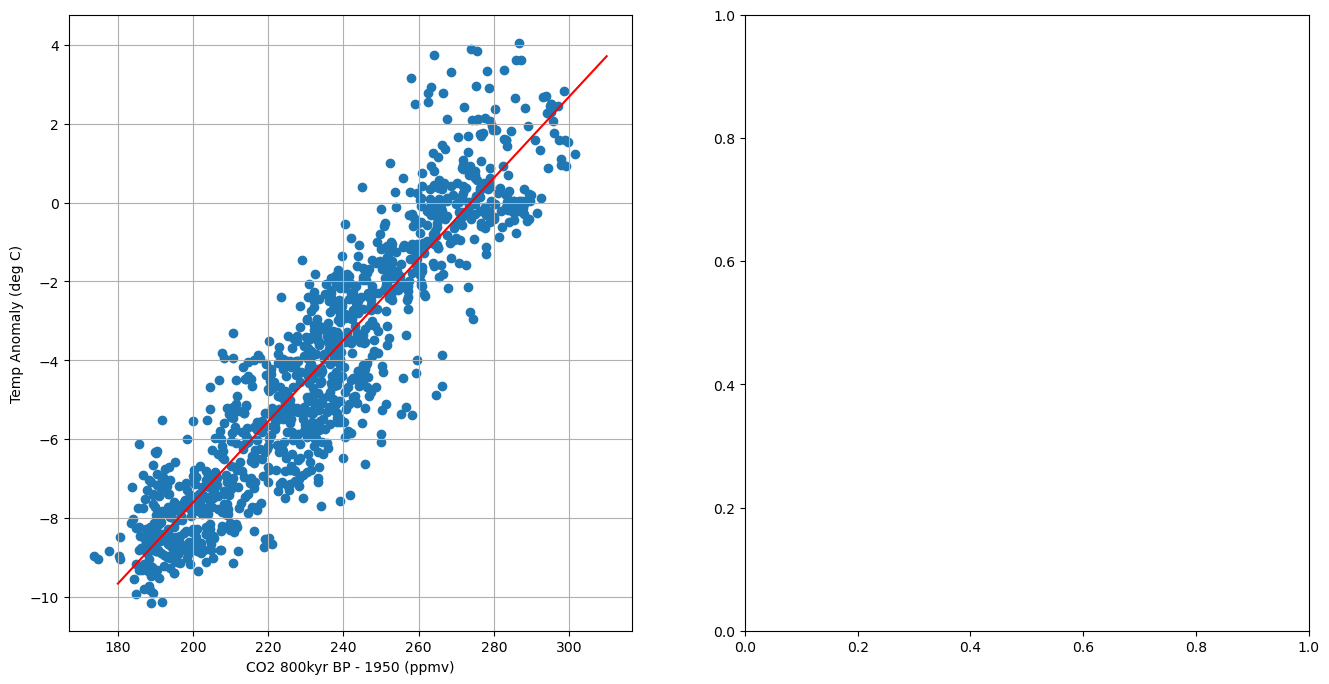

In [25]:
# Do the regression https://realpython.com/linear-regression-in-python/
# remove nans before attempting regression

temp_co2_analysis_df = temp_co2_analysis_df.dropna()
x = np.array(temp_co2_analysis_df['CO2 (ppmv)']).reshape((-1, 1))
y = np.array(temp_co2_analysis_df['Temp Anom Interp'])
model = LinearRegression().fit(x,y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"Slope: {model.coef_}, Intercept: {model.intercept_}")
linear_fit_x = np.arange(180, 320, 10)
linear_fit_y = linear_fit_x * model.coef_ + model.intercept_

fig, axs = plt.subplots(1,2, figsize=(16, 8))
axs[0].scatter(temp_co2_analysis_df['CO2 (ppmv)'], temp_co2_analysis_df['Temp Anom Interp'])
axs[0].plot(linear_fit_x, linear_fit_y, 'r', label='linear fit')
axs[0].set_xlabel("CO2 800kyr BP - 1950 (ppmv)")
axs[0].set_ylabel("Temp Anomaly (deg C)")
axs[0].grid()

plt.show()

## Climate Prediction
The prediction of climate in the future may be conducted based on continuing trends in global rising CO2 emissions, which in turn lead to higher Earth surface temperatures. Plotting the Mauna Loa CO2 Data against the GMST temperature anomaly data, it may be possible to infer future Earth surface temperature.



Age_EDC3 (yrs BP)    float64
CO2 (ppmv)           float64
source                object
dtype: object


ValueError: Length of values (2087) does not match length of index (895)

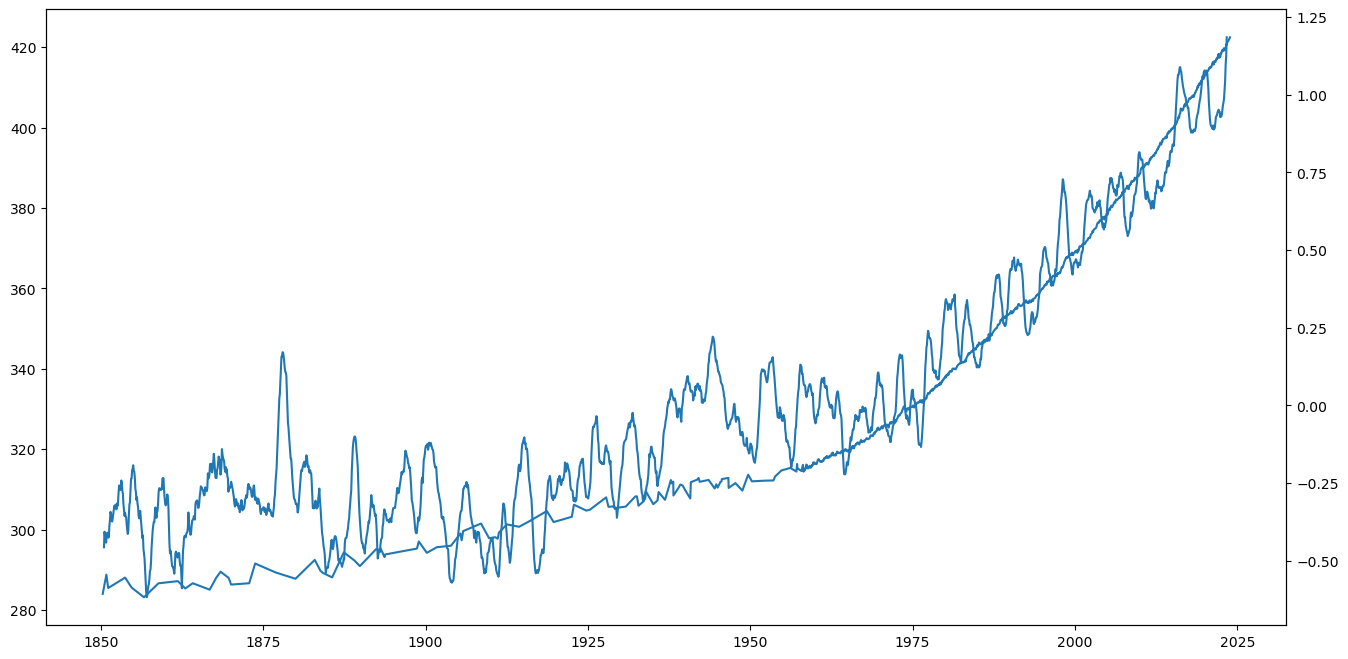

In [35]:

CO2_luthi_comp_plus['Age_EDC3 (yrs BP)'] = pd.to_numeric(CO2_luthi_comp_plus['Age_EDC3 (yrs BP)'])
CO2_luthi_comp_plus['CO2 (ppmv)'] = pd.to_numeric(CO2_luthi_comp_plus['CO2 (ppmv)'])
print(CO2_luthi_comp_plus.dtypes)
Luthi_since_1850 = CO2_luthi_comp_plus[(CO2_luthi_comp_plus['Age_EDC3 (yrs BP)'] < 100) & (CO2_luthi_comp_plus['Age_EDC3 (yrs BP)']>-8.2)].copy()
#modern_CO2_composite = pd.DataFrame(columns=['decimal date', 'CO2 (ppmv)'])
                                    
modern_CO2_composite = Luthi_since_1850[['Age_EDC3 (yrs BP)', 'CO2 (ppmv)']]
modern_CO2_composite['decimal date'] = 1950 - modern_CO2_composite['Age_EDC3 (yrs BP)']
modern_CO2_composite.drop(columns=['Age_EDC3 (yrs BP)'], inplace=True)

CO2_ML_m1 = CO2_ML_m[['decimal date', 'de-seasonalized']]
CO2_ML_m1 = CO2_ML_m1.rename(columns={'de-seasonalized': 'CO2 (ppmv)'}).copy()
#CO2_ML_m1.drop(columns=['Age_EDC3 (yrs BP)'], inplace=True)
#modern_CO2_composite.rename(columns={'monthly average': 'CO2 (ppmv)'}, inplace=True)
modern_CO2_composite = pd.merge_ordered(modern_CO2_composite, CO2_ML_m1, on=['decimal date', 'CO2 (ppmv)'], how='outer')
#modern_CO2_composite.to_csv('test/modernco2.csv')
fig, ax = plt.subplots(1, figsize=(16, 8))

ax.plot(modern_CO2_composite['decimal date'], modern_CO2_composite['CO2 (ppmv)'])
ax2 = ax.twinx()
ax2.plot(GMST_anom_1850['decimal date'], GMST_anom_1850['GMST Anomaly Yearly'])

modern_CO2_composite['new_CO2'] = np.interp(GMST_anom_1850['decimal date'], modern_CO2_composite['decimal date'], modern_CO2_composite['CO2 (ppmv)'])
np.corrcoef(GMST_anom_1850['GMST Anomaly Yearly'], modern_CO2_composite['new_CO2'])

ax.plot(GMST_anom_1850['decimal date'], modern_CO2_composite['new_CO2'])


#ax.plot()
#plt.show()
#modern_CO2_composite

In [ ]:
fig, ax = plt.subplots(1, figsize=(16, 8))
ax.scatter(modern_CO2_composite['new_CO2'], GMST_anom_1850['GMST Anomaly Yearly'])

x = np.array(modern_CO2_composite['new_CO2']).reshape((-1, 1))
y = np.array(GMST_anom_1850['GMST Anomaly Yearly'])
model = LinearRegression().fit(x,y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"Slope: {model.coef_}, Intercept: {model.intercept_}")
#linear_fit_x = np.arange(180, 320, 10)
#linear_fit_y = linear_fit_x * model.coef_ + model.intercept_

fig, axs = plt.subplots(1,2, figsize=(16, 8))
ax.scatter(new_CO2, GMST_anom_1850['GMST Anomaly Yearly'])
ax.plot(linear_fit_x, linear_fit_y, 'r', label='linear fit')

In [ ]:
types = CO2_luthi_comp_plus.dtypes
types
CO2_luthi_comp_plus.to_csv('test/CO2_luthi_comp_plus.csv')

In [ ]:
modern_CO2_composite
